In [26]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [27]:
def trl_dvsn(n):
    
    isprime = True
    cnt = 2
    
    while isprime and cnt < n:
        if n%cnt == 0:
            isprime = False
        else:
            cnt += 1
    
    return isprime

**Problem 1** (3pts for each part): As we covered in class, for a given natural number $n\in \mathbb{N}$, we say it is prime if its only divisors are $1$ and itself.  Otherwise, we say the number is composite.  Likewise, we have the _Fundamental Theorem of Arithmetic_, which says that for any $n\in\mathbb{N}$, $n$ has a prime factorization so that 
$$
n = p_{1}^{k_{1}}\cdots p_{j}^{k_{j}}, ~ k_{j}\in \mathbb{N}
$$
where each $p_{l}$ is prime and the decomposition is unique modulo rearranging the order of the terms.  Show

* If $n$ is composite, show there is a prime factor $p_{j}$ such that $p_{j}\leq\sqrt{n}$.
* If $n>6$ and $n$ is prime, show that there is some $k\in\mathbb{N}$ such that $n=6k+1$ or $n=6k+5$.

Part 1:

First, consider the Fundemantal Theorem of Arithmetic. 

This tells us that 
$$
n = p_{1}^{k_{1}}\cdots p_{j}^{k_{j}}, ~ k_{j}\in \mathbb{N}
$$
now we know that $p_{1} < p_{2}< p_{3} < p_{4} <p_{5}... <p_{j}$ 

If n is compositive that means that at least 2 of pj are his divisors.

Hence $n \geq p_{i}p_{k}$ because, $p_{1} < p_{2}< p_{3} < p_{4} <p_{5}... <p_{j}$ then $n \geq p_{i}p_{k} \geq p_{1}p_{1}$ 

Therefore, $n \geq (p_{1})^{2}$. 

Then, there is a prime factor $p_{j}$ such that $p_{j}\leq\sqrt{n}$

Part 2:


Let n>6. Let n be prime. Now, lets apply the division algorithm thm:

for $a,b \in \mathbb{Z}$ with $b>0$ there exists unique $q,r \in \mathbb{Z}$ such that:
$a = bq + r$    and    $0 \leq r < b$.

Set $b =6$. So $0 \leq r<6$,

We have 5 cases:

case 1: $r=0$, $n= 6q$ $\rightarrow$ this is not possible since n is divisible by 6. But n is prime!


case 2: $r=1$, $n= 6q+1$ $\rightarrow$ this is a possibility!


case 3: $r=2$, $n= 6q+2$ $\rightarrow$ this is not possible since n is divisible by 2. But n is prime!


case 4: $r=3$, $n= 6q+3$ $\rightarrow$ this is not possible since n is divisble by 3. But n is prime!


case 5: $r=4$, $n= 6q+4$ $\rightarrow$ this is not possible since n is divisible by 2. But n is prime!


case 6: $r=5$, $n = 6q+5$ $\rightarrow$ this is a possibility!


In conclusion, $n=6q+1$ or $n=6q+5$. for some q interger (or k as presented above!)

**Problem 2** (10pts): Using the code provided below and the results from Problem 1, 

* Implement a better test of whether a number is prime than the simple trial division algorithm provided above at the beginning of the notebook. Briefly explain the `if n>=49 and n<121` and `elif n>=121` checks as well.  (4pts)  

* Develop several test cases using both the simple algorithm and your new one to make sure your new algorithm is correct.  (3pts)

* For $2\leq n \leq 10^{5}$, compare the difference in times between your new algorithm and the simple one.  Make a semilog plot of the time differences.  Describe any trends you see from your plot.  (3pts)

Alright, first I will explain this algorithm:

As mentioned above we have:

* If $n$ is composite, show there is a prime factor $p_{j}$ such that $p_{j}\leq\sqrt{n}$.
* If $n>6$ and $n$ is prime, show that there is some $k\in\mathbb{N}$ such that $n=6k+1$ or $n=6k+5$.

Now this means that if n is less than 49. Then it is prime if it is not divisible by 2, 3, 5. 
Now, if n is prime and greater than or equal to 49 then there exists a k where:

$$
6k+5 \leq \sqrt{n} \\
or \\
6k+1 \leq \sqrt{n}\\
$$

by doing some algebra:

$$
k \leq \frac{\sqrt{n} -5}{6} \\
or\\
k \leq \frac{\sqrt{n}-1}{6}\\
$$

So, 
if $ 49 \leq n <121$
Then if n got to this test check it means 2,3,5 are not its divisors. Hence, the smallest divisor can be 7. So the only composite numbers who do not divide 2, 3, 5 in this range is $49 = 7*7$ which can only be written in the form of $49 = 6k+1$ for a unique k that is an integer $(k=8)$. 

Then the greatest $k = \lfloor{\frac{\sqrt{n}-1}{6}}\rfloor$

The next prime number after 7 is 11. So if n divisors are not 2,3,4,5 then it's lowest possible divisor is 11. Hence, the range is greater than $121 = 11*11$. 
if $ n \geq 121$
 
Then the greatest $k = \lfloor{\frac{\sqrt{n}-5}{6}}\rfloor$.

Remember that k an integer so we take the floor of these expressions. 

Now we know from the fundemantal thm of arithmetic that every composite is equal to the multiplicity of 2 or more prime numbers. 
Therefore, we will use modular division to test if our number n divides any of the possible prime numbers in the form or 6k+1 or 6k+5 that are all less than n. 

This shortens our algorithm significanlty since the for loop only runs on possible 6k+1 or 6k+5 less than n in comparison to n times. 


In [28]:
def bttr_trl_dvsn(n):
    
    isprime = True
    nsq = np.sqrt(n)
    
    if n%2 == 0 or n%3 == 0 or n%5 == 0:
        if n!=2 and n!=3 and n!=5:
            isprime = False
    else:
        if n<49:
            kmax =0
        if n>=49 and n<121:
            kmax = int(np.floor((nsq-1.)/6.))
        elif n>=121:
            kmax = int(np.floor((nsq-5.)/6.))
        
        if kmax > 0:
            for kk in range(0,kmax):
                tstnmbr = 6*(kk+1)+1
                if n%tstnmbr==0:
                    isprime = False
                    break
                else:
                    tstnmbr= 6*(kk+1)+5
                    if tstnmbr <= nsq:
                        if n%tstnmbr==0:
                            isprime== False
                            break
    
    return isprime

Testing a couple numbers:

In [29]:
print(bttr_trl_dvsn(8221))
print(trl_dvsn(8221))

True
True


In [30]:
print(bttr_trl_dvsn(343))
print(trl_dvsn(343))

False
False


In [31]:
print(bttr_trl_dvsn(49))
print(trl_dvsn(49))

False
False


In [32]:
print(bttr_trl_dvsn(101))
print(trl_dvsn(101))

True
True


In [33]:
print(bttr_trl_dvsn(105))
print(trl_dvsn(105))

False
False


In [34]:
print(bttr_trl_dvsn(911))
print(trl_dvsn(911))

True
True


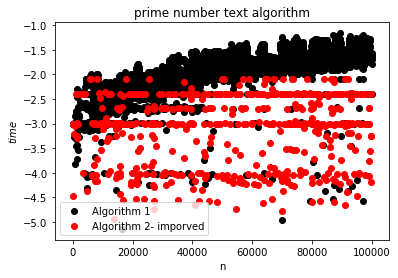

In [37]:
nmax = int(1e5) 
nvals = np.arange(2,nmax+1)
nlen = nvals.size
timesstd = np.zeros(nlen)
timesbtr = np.zeros(nlen)

for jj in range(nlen):
    start= time()
    trl_dvsn(jj)
    end=time() 
    timesstd[jj] = end-start
    
    start=time()
    bttr_trl_dvsn(jj)
    end=time()
    timesbtr[jj] = end-start
    
plt.scatter(nvals,np.ma.log10(timesstd),color='k', label = 'Algorithm 1')
plt.scatter(nvals,np.ma.log10(timesbtr),color='r', label = 'Algorithm 2- imporved')
plt.title("prime number text algorithm")
plt.xlabel("n")
plt.ylabel("$time$")
plt.legend()

In the graph above, you can see the run time for both algoirthms. The first Algorithm (black graph) takes a longer time to run. In addition, as n gets bigger the run time for 'Algorithm 1' increases. This is because the first algorithm runs a for loop for all numbers less than n- the given number tested. In compasion, the second Algorithm (the improved Algorithm that used mathematical tools from number theory- Division Algorithm thm and the fundamental Arithmetic thm) is more flat and consistent. This is because it uses less values in its for loop. This avoids all the tedious computation the first algorithm does and therefore is far more efficient. As n gets larger the difference in run time between the two Algorithms will get bigger. 


The reason the red graph- Algorithm 2 (improved) is more scattered is because some numbers in the range will break after the first if statement that tests if n is divisible by 2 or 3 or 5. hence it will not even follow to the else statement that consists of for loops. Therefore, the run time for these numbers is a constant O(1). Yet, for numbers greater than 121 that are not divisible by 2 or 3 or 5 will have to run the for loop for maximum k which will take more time. This explains the jump in red dots. It all depends on when the function breaks. 